<a href="https://colab.research.google.com/github/TyamanovaMargo/DI-Bootcamp/blob/main/dailyChallenge_week5_d2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

#Data Exploration: Load and visualize the data

Use pandas to load the dataset and examine the first few rows

In [3]:


url = "https://raw.githubusercontent.com/kaleko/CourseraML/master/ex2/data/ex2data1.txt"
data = pd.read_csv(url, header=None, names=['Exam1', 'Exam2', 'Admission'])  # names explicitly specifies column names.


print(data.head())

       Exam1      Exam2  Admission
0  34.623660  78.024693          0
1  30.286711  43.894998          0
2  35.847409  72.902198          0
3  60.182599  86.308552          1
4  79.032736  75.344376          1


Create a scatter plot to visualize the data points for students who were admitted versus those who were not based on their exam scores.

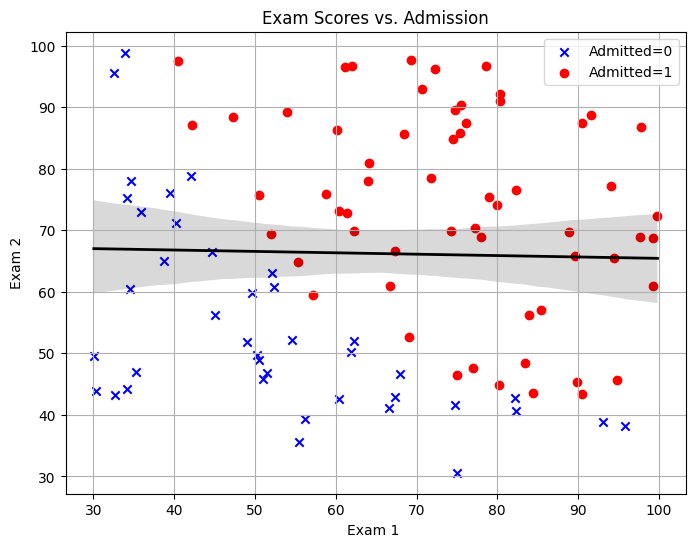

In [11]:
# Scatter plot
plt.figure(figsize=(8, 6))
for label, color, marker in [(0, 'blue','x' ), (1, 'red', 'o')]:
    subset = data[data['Admission'] == label]
    plt.scatter(subset['Exam1'], subset['Exam2'], label=f'Admitted={label}', color=color, marker=marker)
#trend line
sns.regplot(x='Exam1', y='Exam2', data=data, scatter=False, color='black', line_kws={"linewidth": 2})

# Labels and title
plt.xlabel('Exam 1 ')
plt.ylabel('Exam 2')
plt.title('Exam Scores vs. Admission')
plt.legend()
plt.grid(True)
plt.show()

#Applying Logistic Regression with scikit-learn

Implement logistic regression using the LogisticRegression function from scikit-learn to find the best parameters for your model.


Train the logistic regression model on your dataset

Solver is the algorithm to use in the optimization problem. The choices are {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’.

**lbfgs** relatively performs well compared to other methods and it saves a lot of memory, however, sometimes it may have issues with convergence.

**sag** faster than other solvers for large datasets, when both the number of samples and the number of features are large.

**saga** the solver of choice for sparse multinomial logistic regression and it’s also suitable for very large datasets.

**newton-cg **computationally expensive because of the Hessian Matrix.
liblinearrecommended when you have a high dimension dataset - solving large-scale classification problems.

In [29]:

# Split into features (X) and labels (y)
X = data[['Exam1', 'Exam2']].values
y = data['Admission'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train logistic regression model
clf = LogisticRegression(random_state=0) #default=’lbfgs’
clf.fit(X_train, y_train)

# predict for the test set
y_pred = clf.predict(X_test)
print("Predictions:", y_pred)

#  accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Predictions: [0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1]
Accuracy on test set: 0.8

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.90      0.75      0.82        12

    accuracy                           0.80        20
   macro avg       0.80      0.81      0.80        20
weighted avg       0.82      0.80      0.80        20



Making Predictions,Model Evaluation

In [28]:
# Split into features (X) and labels (y)
X = data[['Exam1', 'Exam2']].values
y = data['Admission'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train logistic regression model
clf = LogisticRegression(solver='liblinear',random_state=0) # solver another
clf.fit(X_train, y_train)

# predict for the test set
y_pred = clf.predict(X_test)
print("Predictions:", y_pred)

#  accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Predictions: [1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1]
Accuracy on test set: 0.9

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.86      1.00      0.92        12

    accuracy                           0.90        20
   macro avg       0.93      0.88      0.89        20
weighted avg       0.91      0.90      0.90        20



In [30]:
# Split into features (X) and labels (y)
X = data[['Exam1', 'Exam2']].values
y = data['Admission'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train logistic regression model
clf = LogisticRegression(solver='sag',random_state=0) # solver another
clf.fit(X_train, y_train)

# predict for the test set
y_pred = clf.predict(X_test)
print("Predictions:", y_pred)

#  accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Predictions: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Accuracy on test set: 0.6

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.60      1.00      0.75        12

    accuracy                           0.60        20
   macro avg       0.30      0.50      0.38        20
weighted avg       0.36      0.60      0.45        20



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use

In [31]:

# Split into features (X) and labels (y)
X = data[['Exam1', 'Exam2']].values
y = data['Admission'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train logistic regression model
clf = LogisticRegression(solver='saga',random_state=0) # solver another
clf.fit(X_train, y_train)

# predict for the test set
y_pred = clf.predict(X_test)
print("Predictions:", y_pred)

#  accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Predictions: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Accuracy on test set: 0.6

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.60      1.00      0.75        12

    accuracy                           0.60        20
   macro avg       0.30      0.50      0.38        20
weighted avg       0.36      0.60      0.45        20



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use

Solvers "sag" and " saga" shows worth results,solver='liblinear' shows best perfomance